## Machine Learning Assignment
## Arunima Srivastava
## DSTC - 23/24 - 004

##### The objective is to make prediction based on diagnostic measurements whether a patient has diabetes or not by applying machine learning algorithm for classification.
##### Here the number of instances in dataset is 768
#####          the number of attributes in dataset is 8

In [2]:
# importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# understanding the dataset
data = pd.read_csv("C:\\Users\\Arunima Srivastava\\Downloads\\diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
data.shape

(768, 9)

##### From the data.info() we see that there is no null values present in the dataset but in place of null values 0 is written i.e., some entries of 'Glucose' , 'BloodPressure' , 'SkinThickness' , 'Insulin' and 'BMI' which logically is not possible.

In [4]:
data.shape
data.info()
# from the info of the dataset we clearly see that there is no null values in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [30]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


##### 'Insulin' has 374 zero entries and from the feature selection technique it has least impact on data so we drop the feature 'Insulin' and drop those rows in which 'BloodPresure' and 'SkinThickness' both are zero. and rest all replaced by their respective medians.

In [5]:
df = data.drop(columns=["Insulin"],axis=1)
df
df['Glucose'] = df['Glucose'].replace(0,np.nan)
df['BloodPressure'] = df['BloodPressure'].replace(0,np.nan)
df['SkinThickness'] = df['SkinThickness'].replace(0,np.nan)
df['BMI'] = df['BMI'].replace(0,np.nan)
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [6]:
df1= df.drop(df[(df['BloodPressure'].isna()) & (df['SkinThickness'].isna())].index)
df1.isnull().sum()
df1['SkinThickness'] = df1['SkinThickness'].replace(np.nan,df1['SkinThickness'].median())
df1.isnull().sum()
df1['Glucose'] = df1['Glucose'].replace(np.nan,df1['Glucose'].median())
df1['BloodPressure'] = df1['BloodPressure'].replace(np.nan,df1['BloodPressure'].median())
df1['BMI'] = df1['BMI'].replace(np.nan,df1['BMI'].median())
df1.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

##### now our data is cleaned and ready to fit a model by applying machine learning algorithm.    

In [7]:
df1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,43.1,2.288,33,1


array([[<Axes: xlabel='Pregnancies', ylabel='Pregnancies'>,
        <Axes: xlabel='Glucose', ylabel='Pregnancies'>,
        <Axes: xlabel='BloodPressure', ylabel='Pregnancies'>,
        <Axes: xlabel='SkinThickness', ylabel='Pregnancies'>,
        <Axes: xlabel='BMI', ylabel='Pregnancies'>,
        <Axes: xlabel='DiabetesPedigreeFunction', ylabel='Pregnancies'>,
        <Axes: xlabel='Age', ylabel='Pregnancies'>,
        <Axes: xlabel='Outcome', ylabel='Pregnancies'>],
       [<Axes: xlabel='Pregnancies', ylabel='Glucose'>,
        <Axes: xlabel='Glucose', ylabel='Glucose'>,
        <Axes: xlabel='BloodPressure', ylabel='Glucose'>,
        <Axes: xlabel='SkinThickness', ylabel='Glucose'>,
        <Axes: xlabel='BMI', ylabel='Glucose'>,
        <Axes: xlabel='DiabetesPedigreeFunction', ylabel='Glucose'>,
        <Axes: xlabel='Age', ylabel='Glucose'>,
        <Axes: xlabel='Outcome', ylabel='Glucose'>],
       [<Axes: xlabel='Pregnancies', ylabel='BloodPressure'>,
        <Axes: xlabel=

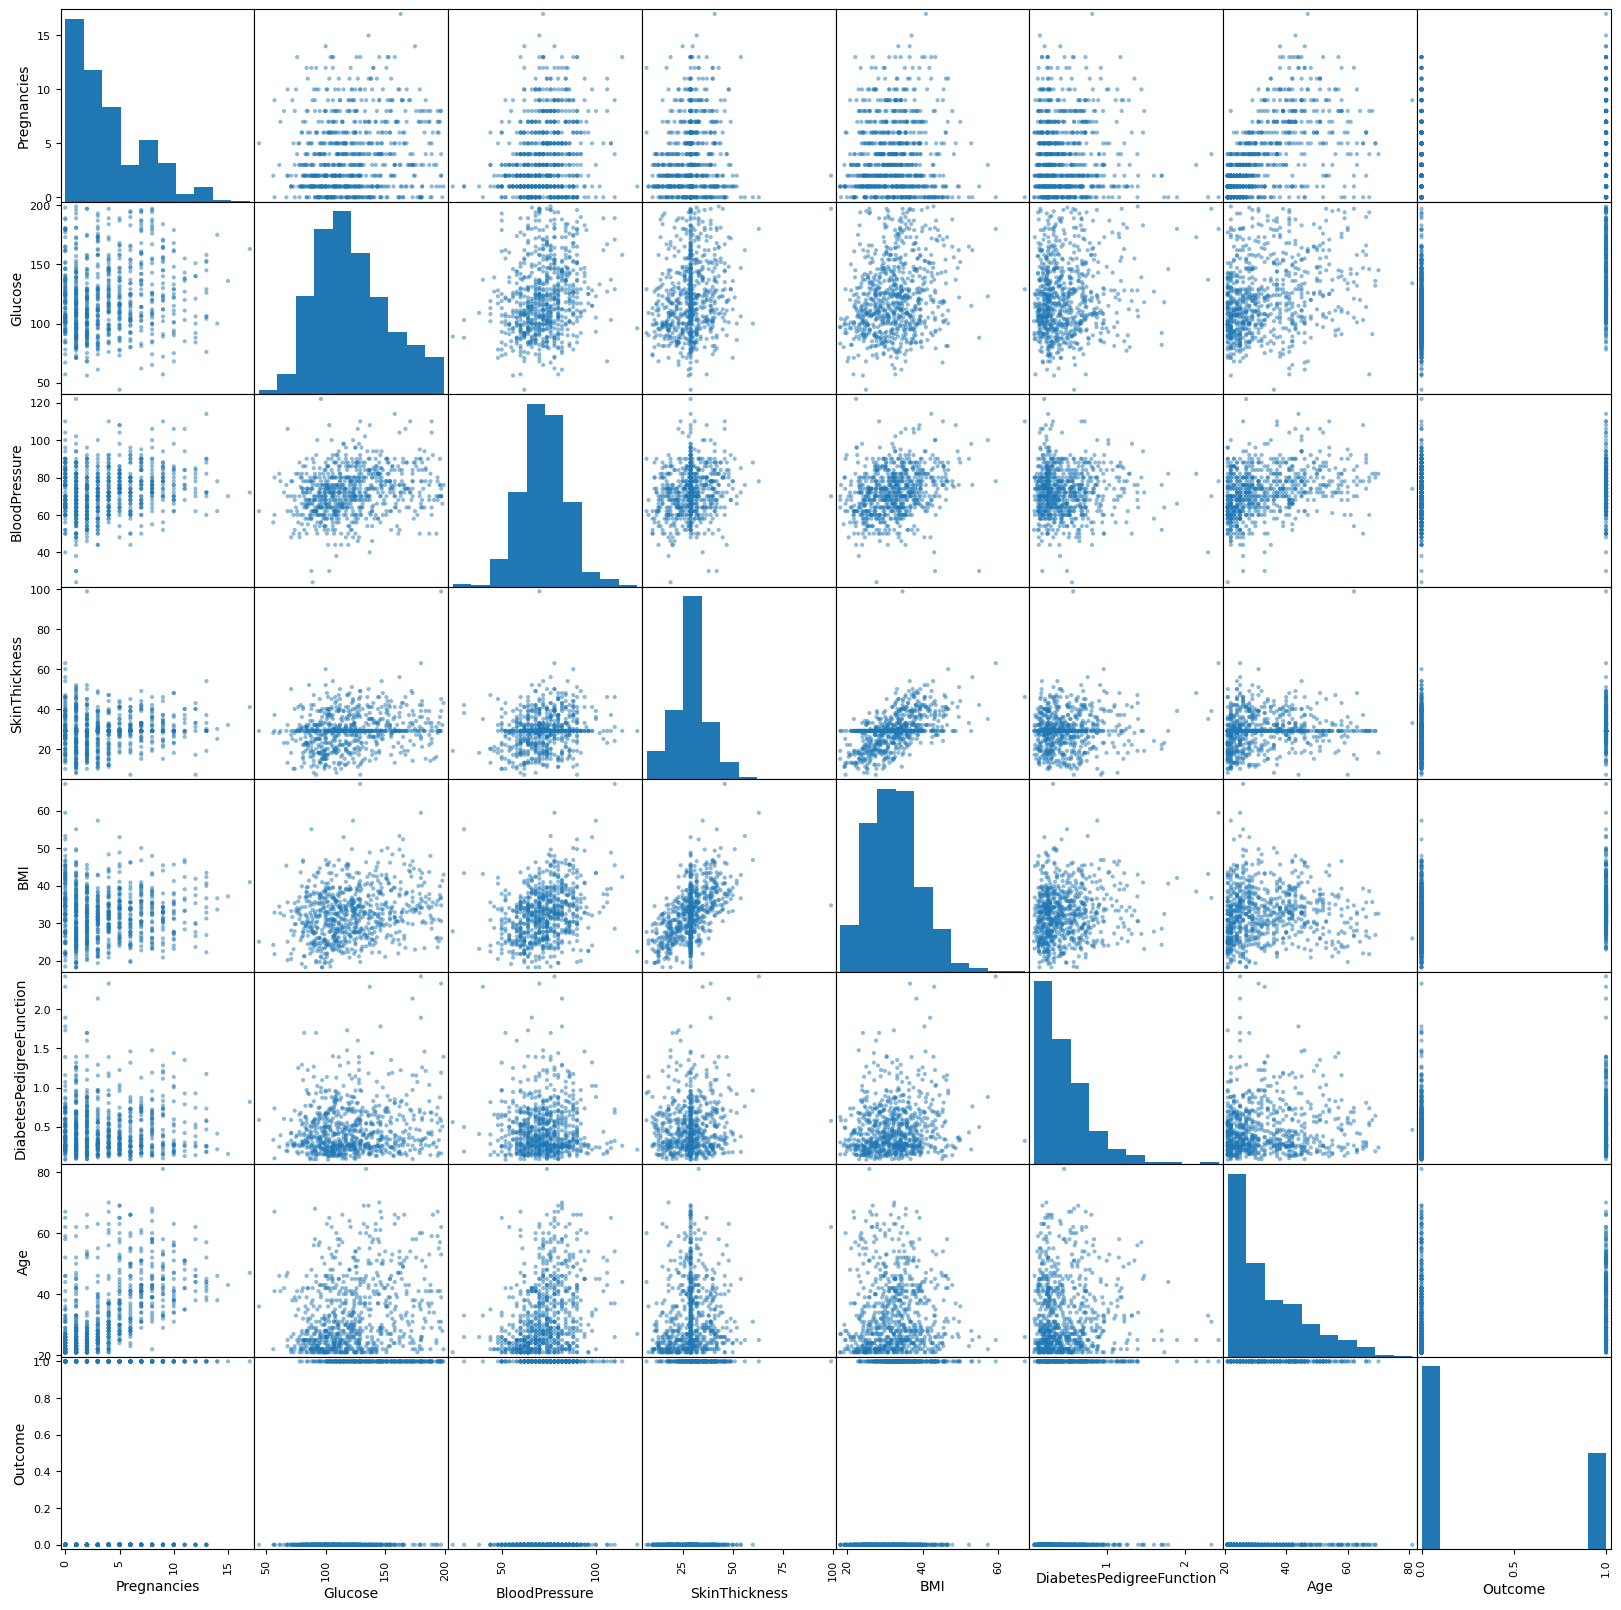

In [26]:
# Data visualization for better understanding of dataset
from pandas.plotting import scatter_matrix
scatter_matrix(df1,figsize=(20,20))

<Axes: >

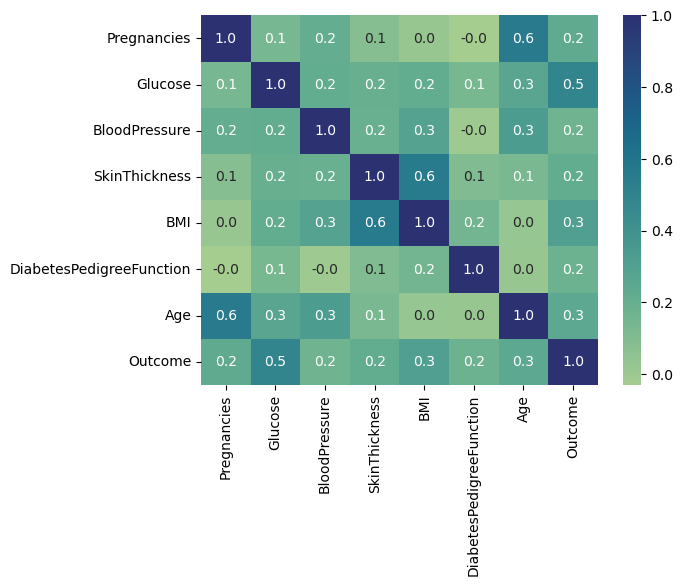

In [9]:
# analysing the relationship between the variables using correlation heatmap
corrmat = df1.corr()
corrmat
corr_feature = corrmat.index
sns.heatmap(df1[corr_feature].corr(),annot=True,cmap="crest",fmt="0.1f")

##### now split the dataset into x and y and then scale the data since all the features have different units so we standardize the data using StandardScaler from sklearn library. 
##### then split the dataset into train data and test data and fit naive bayes classification, make predictions and test the accuracy of the model.

In [10]:
# splitting the dataset into x and y
target_name = 'Outcome'
# seperate object for target feature
y = df1[target_name]
# seperate object for input features
x = df1.drop(target_name,axis=1)


#  since all the features are in different units so we have to scale the data using standardization technique
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)
new_x = scaler.transform(x)
new_x

array([[ 0.63365504,  0.85772958, -0.03270094, ...,  0.16404344,
         0.45133621,  1.40698336],
       [-0.85052742, -1.20496417, -0.51826038, ..., -0.85651701,
        -0.37576898, -0.19999485],
       [ 1.22732802,  2.00367056, -0.68011352, ..., -1.33763836,
         0.58619032, -0.11541705],
       ...,
       [ 0.33681855, -0.02628203, -0.03270094, ..., -0.91483475,
        -0.69342532, -0.28457266],
       [-0.85052742,  0.13742383, -1.00381981, ..., -0.34623679,
        -0.3817625 ,  1.15324996],
       [-0.85052742, -0.94303481, -0.19455409, ..., -0.30249848,
        -0.48365227, -0.87661726]])

In [11]:
# train test splitting
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(new_x,y,test_size=0.25,random_state=10)
x_train.shape , x_test.shape , y_train.shape , y_test.shape

((551, 7), (184, 7), (551,), (184,))

In [37]:
# now applying Naive Bayes classifier as machine learning algorithm for classification
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb_model = nb.fit(x_train,y_train)
nb_pred = nb.predict(x_test)
from sklearn.metrics import accuracy_score
print("train accuracy of naive bayes:",nb.score(x_train,y_train)*100)
print("test accuracy of naive bayes:",nb.score(x_test,y_test)*100)
print("accuracy test score of naive bayes:",accuracy_score(y_test,nb_pred)*100)

train accuracy of naive bayes: 73.502722323049
test accuracy of naive bayes: 83.69565217391305
accuracy test score of naive bayes: 83.69565217391305


In [36]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf_model = rf.fit(x_train,y_train)
rf_pred = rf.predict(x_test)
rf_score = rf.score(x_test,y_test)*100
rf_score
print("train accuracy of random forest classifier:",rf.score(x_train,y_train)*100)
print("test accuracy of random forest classifier:",rf.score(x_test,y_test)*100)

train accuracy of random forest classifier: 100.0
test accuracy of random forest classifier: 78.26086956521739


In [42]:
#fitting a logistics regression model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr_model = lr.fit(x_train,y_train)
lr_pred = lr.predict(x_test)
lr_score = lr.score(x_test,y_test)*100
lr_score
print("train accuracy of logistic regression:",lr.score(x_train,y_train)*100)
print("test accuracy of logistc regression:",lr.score(x_test,y_test)*100)

train accuracy of logistic regression: 76.40653357531761
test accuracy of logistc regression: 79.34782608695652


##### confusion matrix is a table which is used to describe the performance of a classification problem. It visualizes the accuracy of a classifier by comparing predicted values with actual values. The terms used in confusion matrix are true positive (TP) , true negative (TN) , false positive (FP) , false negative (FN).
##### TP : predicted result is positive while it is labelled as positive.
##### TN : predicted result is negative while it is labelled as negative.
##### FP : predicted result is positive while it is labelled as negative ( Type - I error ).
##### FN : predicted result is negative while it is labelled as positive ( Type - II error ).
#####                       TN = cm [ 0, 0 ]   ,   TP = cm [ 1,1 ]   ,   FN = cm [ 1,0 ]   ,   FP = cm [ 0,1 ]

<Axes: >

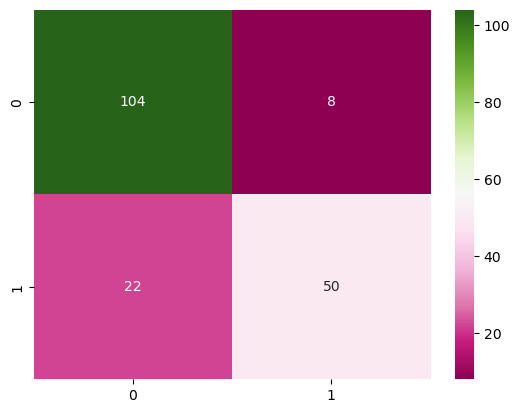

In [14]:
from sklearn.metrics import classification_report,confusion_matrix
cm = confusion_matrix(y_test,nb_pred)
cm
sns.heatmap(cm,annot=True,fmt="d",cmap="PiYG")

<Axes: >

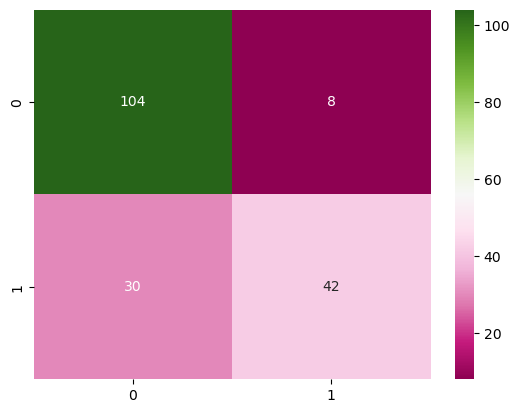

In [40]:
cm_lr = confusion_matrix(y_test,lr_pred)
cm_lr
sns.heatmap(cm_lr,annot=True,fmt="d",cmap="PiYG")

##### precision is also known as positive predicted value. It is the ratio of correctly predicted (TP) observations to the total predicted positive (TP+FP) observations.
##### precision = TP / (TP+FP)
##### recall score is sensitivity also known as true positive rate (TPR). It is the probability that a true case will test positive
##### sensitivity = TP / (TP+FN)
##### specificity is the probability that a true negative will test negative. it is also known as true negative rate (TNR).
##### false positive rate (FPR) = 1-specificity

In [21]:
# precision
from sklearn.metrics import precision_score
print("precision score is:",precision_score(y_test,nb_pred)*100)
print(classification_report(y_test,nb_pred))

precision score is: 86.20689655172413
              precision    recall  f1-score   support

           0       0.83      0.93      0.87       112
           1       0.86      0.69      0.77        72

    accuracy                           0.84       184
   macro avg       0.84      0.81      0.82       184
weighted avg       0.84      0.84      0.83       184



##### A confusion matrix produces a single ROC point. Thus a collection of confusion matrix created based on different cut offs produces an ROC curve. When the cut off point varies throughout the real line, the resulting plot of sensitivity against 1 - specificity is called the receiver operating characteristic (ROC) curve.
##### the closer the area under curve is to 1 , the better the model. The diagonal line serves as a reference line since it is the ROC curve of a diagnostic test that randomly classifies the condition.
##### here 87% area under the curve represents that there is 87% chance we made the predictions correctly i.e., we identify those pregnant women who actually having diabetes .

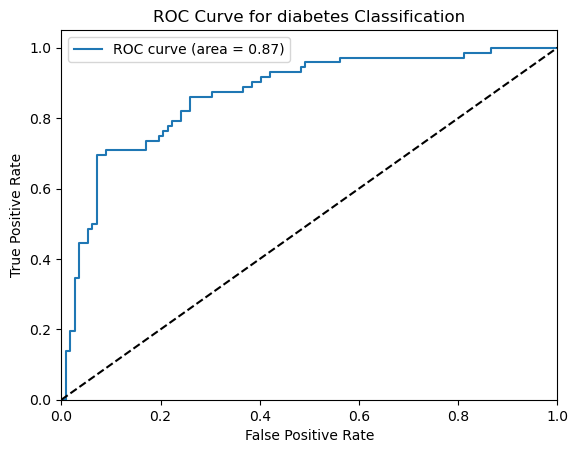

In [22]:
# roc curve
from sklearn.metrics import roc_curve , auc

# Predict probabilities on the test set
y_pred_prob = nb.predict_proba(x_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob) 
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()  
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for diabetes Classification')
plt.legend()
plt.show()

In [17]:
df1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,43.1,2.288,33,1


In [33]:
#features = [pregnancies,glucose,bloodPressure,skinthickness, BMI, DiabetesPedigreeFunction, Age]
input_data = (1,89,66,23,28.1,0.167,21)
input_data_array = np.asarray(input_data)
input_data_reshaped = input_data_array.reshape(1,-1)
std_data = scaler.transform(input_data_reshaped)
prediction = nb_model.predict(std_data)
print(prediction)

if (prediction[0]==0):
    print('the person is not diabetic')
else:
    print('the person is diabetic')

[0]
the person is not diabetic


C:\Users\Arunima Srivastava\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [43]:
#features = [pregnancies,glucose,bloodPressure,skinthickness, BMI, DiabetesPedigreeFunction, Age]
input_data = (1,89,66,23,28.1,0.167,21)
input_data_array = np.asarray(input_data)
input_data_reshaped = input_data_array.reshape(1,-1)
std_data = scaler.transform(input_data_reshaped)
prediction = lr_model.predict(std_data)
print(prediction)

if (prediction[0]==0):
    print('the person is not diabetic')
else:
    print('the person is diabetic')

[0]
the person is not diabetic


C:\Users\Arunima Srivastava\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
